In [1]:
import pandas as pd

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/timeline.csv')
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [15]:
df['month'] = pd.to_datetime(df.month)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [17]:
df.set_index('month', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


<AxesSubplot:xlabel='month'>

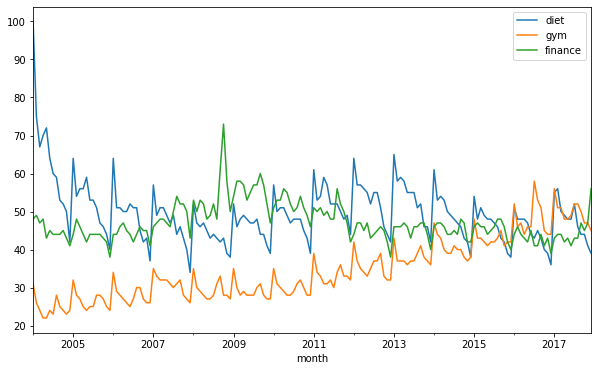

In [21]:
df.plot(figsize=(10, 6))

<AxesSubplot:xlabel='month'>

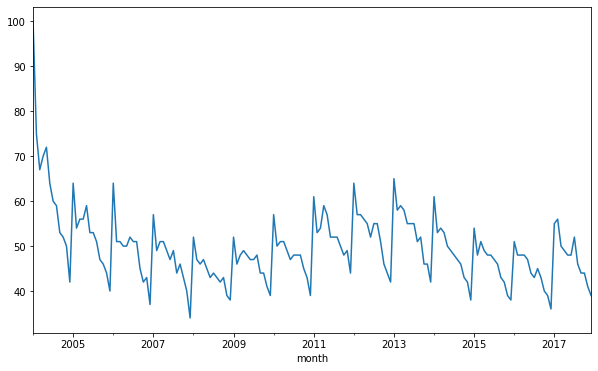

In [22]:
df['diet'].plot(figsize=(10, 6))

<AxesSubplot:xlabel='month'>

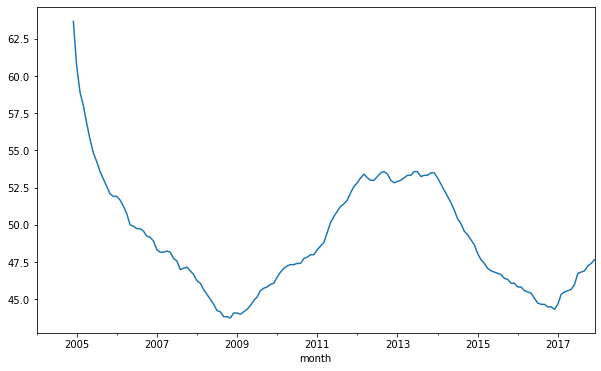

In [24]:
#média móvel, tirando o ruído para interpretar a tendência
df.diet.rolling(12).mean().plot(figsize=(10, 6))

<AxesSubplot:xlabel='month'>

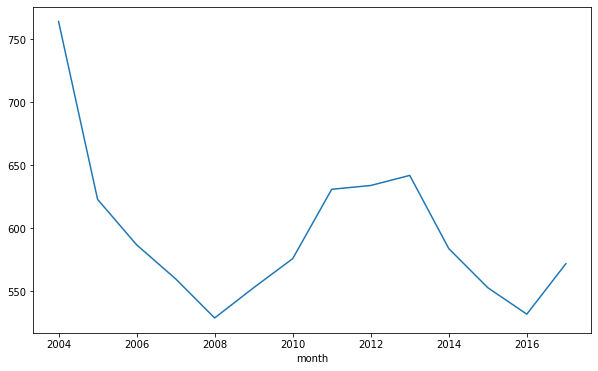

In [28]:
df.diet.groupby(df.index.year).sum().plot(figsize=(10, 6))

<AxesSubplot:xlabel='month'>

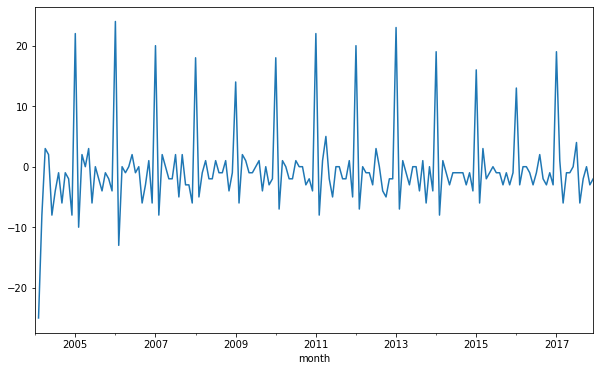

In [30]:
#Analisando a sazonalidade
#negativo houve queda
df.diet.diff().plot(figsize=(10, 6))

<AxesSubplot:xlabel='month'>

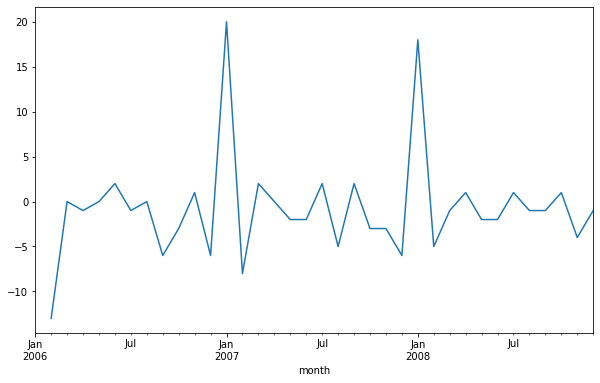

In [33]:
filtro = (df.index.year >= 2006) & (df.index.year <= 2008)
df[filtro].diet.diff().plot(figsize=(10, 6))

<AxesSubplot:xlabel='month'>

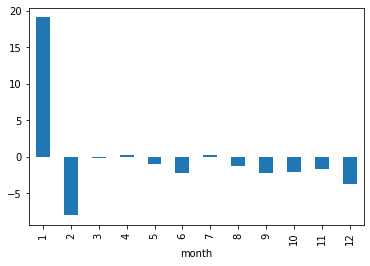

In [34]:
df.diet.diff().groupby(df.index.month).mean().plot(kind='bar')

## Parte 2